# User items (EDA)


The following notebook shows an exploratory data analysis using the data from the user items (after subjecting such file to some transformations and a cleaning process). 

In [1]:
#Needed_Libraries

import pandas as pd
import numpy as np
import ast
from matplotlib import pyplot as plt
from etl_functions import general_information

In [2]:
df=pd.read_csv("cleaned_data/items_cleaned.csv")

In [3]:
df.head(5)

,item_id,playtime_forever,user_id
0,10,6,76561197970982479
1,10,0,js41637
2,1200,923,evcentric
3,10,0,Riot-Punch
4,300,1131,doctr


In [5]:
general_information(df)

,column,data_type,missing_values,missing_values_percentage
0,item_id,<class 'str'>,0,0.0
1,playtime_forever,<class 'str'>,0,0.0
2,user_id,<class 'str'>,0,0.0


In [6]:
#Most played game
df_item=df.groupby("item_id")["playtime_forever"].sum().reset_index()

In [7]:
df_item.head(5)

,item_id,playtime_forever
0,10,320012
1,20,8309
2,30,1985
3,40,618
4,50,7890


In [8]:
df_tp10_item=df_item.loc[0:9,:]

In [9]:
df_tp10_item.sort_values(by="playtime_forever",ascending=True,inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_25140\3965977231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10_item.sort_values(by="playtime_forever",ascending=True,inplace=True)


In [11]:
df_tp10_item

,item_id,playtime_forever
3,40,618
2,30,1985
5,60,2161
9,130,4385
8,100,7271
4,50,7890
1,20,8309
7,80,26892
6,70,28792
0,10,320012


In [12]:
df_tp10_item["item_name"]=["Deathmatch Classic","Day of Defeat","Ricochet","Half-Life: Blue Shift","Unknown","Half-Life: Opposing Force","Team Fortress Classic","Counter-Strike: Condition Zero","Half Life","Counter-Strike"]

C:\Users\diego\AppData\Local\Temp\ipykernel_25140\2001666441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10_item["item_name"]=["Deathmatch Classic","Day of Defeat","Ricochet","Half-Life: Blue Shift","Unknown","Half-Life: Opposing Force","Team Fortress Classic","Counter-Strike: Condition Zero","Half Life","Counter-Strike"]


Text(0.5, 1.0, 'Top 10 most played games')

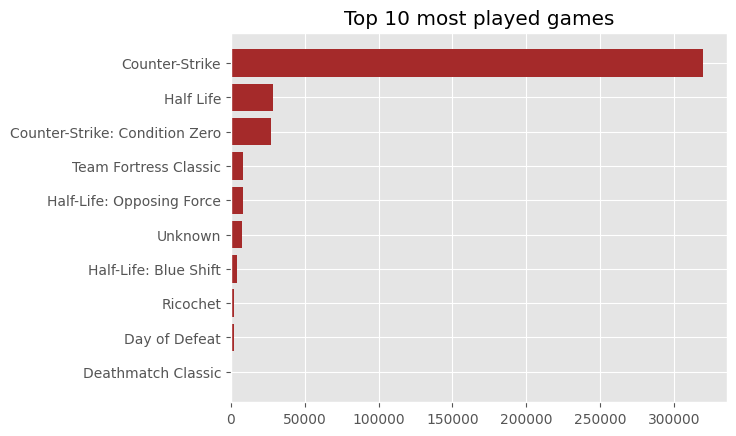

In [13]:
plt.style.use("ggplot")
plt.barh(df_tp10_item["item_name"],df_tp10_item["playtime_forever"],color="brown")
plt.title("Top 10 most played games")

In [18]:
#Top players
df_user=df.groupby("user_id")["playtime_forever"].sum().reset_index()

In [19]:
df_user.head(5)

,user_id,playtime_forever
0,-AnimeIsMyThing-,294253
1,-Azsael-,469257
2,-GM-Dragon,153433
3,1234865654,119564
4,12549,25213


In [20]:
df_tp10_users=df_user.loc[0:9,:]

In [21]:
df_tp10_users.sort_values(by="playtime_forever",ascending=True,inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_25140\1470888806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10_users.sort_values(by="playtime_forever",ascending=True,inplace=True)


C:\Users\diego\AppData\Local\Temp\ipykernel_25140\1956230550.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Top 10 players')

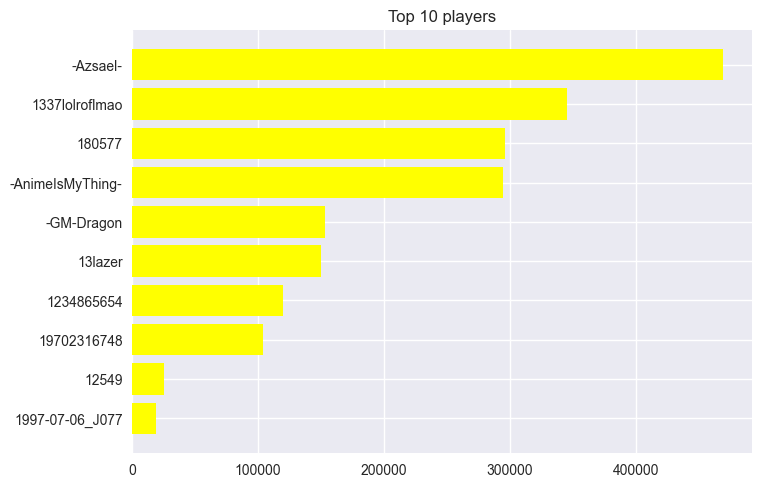

In [22]:
plt.style.use("seaborn")
plt.barh(df_tp10_users["user_id"],df_tp10_users["playtime_forever"],color="yellow")
plt.title("Top 10 players")